In [1]:
# Install libraries required
import regex as re
import pandas as pd
from datetime import datetime
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
%matplotlib inline
import json
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nepsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df = pd.read_json('result.json')

In [2]:
# Reading data-file
with open('result.json', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(list(data))

In [3]:
# Select required columns
df = df[['date', 'from', 'text']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1640 non-null   object
 1   from    1617 non-null   object
 2   text    1640 non-null   object
dtypes: object(3)
memory usage: 38.6+ KB


In [5]:
# Working with datetime format
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S")

In [8]:
# Descriptive chat statistics

df['text'] = df['text'].astype("string")
total_messages = df['text'].count()

def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if word in emoji.UNICODE_EMOJI['en'].keys():
            emoji_list.append(word)

    return emoji_list


df['emoji'] = df['text'].apply(split_count)
emojis = sum(df['emoji'].str.len())

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.text.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

links = np.sum(df.urlcount)

media_messages = df[df['text'] == ''].shape[0]

print("Put_your_chat_name_here")
print("Messages:", total_messages)
print("Emojis:", emojis)
print("Links:", links)
print("Media", media_messages)

Put_your_chat_name_here
Messages: 1640
Emojis: 47
Links: 267
Media 127


In [10]:
# Descriptive statistics for each chat member

media_messages_df = df[df['text'] == '']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['text'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['text'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"] = 1

l = ['member_1', 'member_2', 'member_3','etc']

for i in range(len(l)):
    
    # Filter messages by a specific member
    req_df = messages_df[messages_df['from'] == l[i]]
    print(f'Stats of {l[i]} -')
  
    # shape prints the number of lines = the number of messages sent by the member
    print('Messages Sent', req_df.shape[0])
    
    # Word_Count = the total number of words in one message sent by the member
    # words_per_message = Word_Count / the total number of messages by member
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    
    # media = media messages sent by the member
    media = media_messages_df[media_messages_df['from'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    
    # emojis = total emojis sent by the member
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    
    #links = total links sent by the member
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)   
    
    print()

Stats of member_1 -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of member_2 -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of member_3 -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of etc -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



C:\Users\Nepsh\AppData\Local\Temp\ipykernel_25520\2773884242.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [11]:
# Chat word cloud

text = " ".join(review for review in messages_df.text)
print ("There are {} words in all the messages.".format(len(text)))

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.figure( figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 218078 words in all the messages.


NameError: name 'stop_words' is not defined

In [12]:
# Word cloud for each chat member

l = ['member_1', 'member_2', 'member_3','etc']

for i in range(len(l)):
    dummy_df = messages_df[messages_df['from'] == l[i]]
    text = " ".join(review for review in dummy_df.text)
    stop_words = stopwords.words('russian')
    stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на', '...'])

    print('Author name', l[i])
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
  
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Author name member_1


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [14]:
import re
from collections import Counter
import emoji
import numpy
import names
import pandas as pd
from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS

In [20]:
df = pd.read_json('result.json', dtype={'from_id': str})
df = df[df.from_id != 'nan'] # This is a telegram service, likely updates

# Grab all unique Id's, and re-write the names.
from_ids = df['from_id'].unique()
for from_id in from_ids:
    df.loc[df.from_id == from_id, 'from'] = names.get_first_name()

In [21]:
df[['type','from']].groupby(['from']).count().sort_values(['type'], ascending=False)

,type
from,
Joyce,818
Linda,494
Samuel,143
Wendy,97
Michael,34
Dawn,11
Martha,11
Carlene,8
Charles,1


In [ ]:
df[['media_type', 'id']].groupby('media_type', as_index=False).count()

In [33]:
import json
with open('result.json', encoding="utf8") as f:
    d = json.load(f)
df = pd.DataFrame(d)

In [40]:
import numpy as np
import pandas as pd
df.drop(['reply_to_message_id', 'edited','photo', 'width', 'height', 'file', 'thumbnail',
       'media_type', 'mime_type', 'duration_seconds',
       'forwarded_from', 'actor', 'actor_id',
       'action',
       'poll'], axis=1, inplace=True)

C:\Users\Nepsh\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



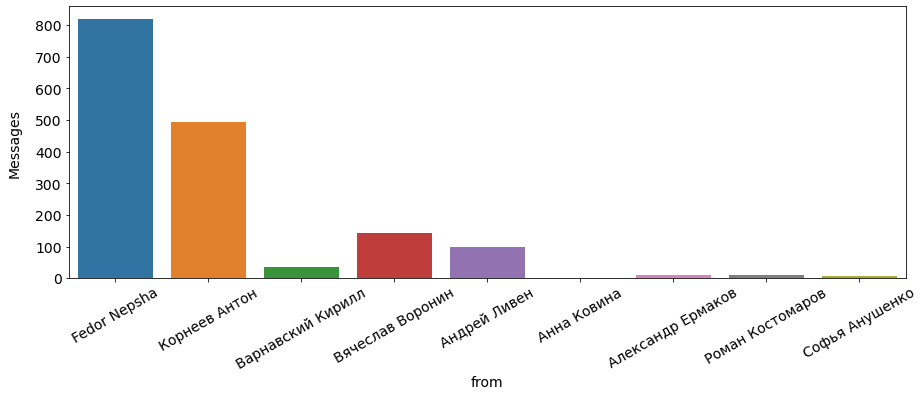

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ax = sns.countplot('from', data=df)
plt.ylabel("Messages", labelpad=14)
plt.xticks(rotation=30)
plt.rcParams.update({'font.size': 14})

In [118]:
df

,id,type,date,date_unixtime,title,members,text,text_entities,from,from_id,edited_unixtime,message_id,month,hour,period
0,61810,service,2017-04-09T10:22:29,1638725699,"НИЛ Электроэнергетика - PF, Прогнозирование","[Fedor Nepsha, Вячеслав Воронин, Андрей Ливен,...",,[],NaN,NaN,NaN,NaN,04,10,Morning
1,61811,message,2021-12-05T20:35:10,1638725710,NaN,NaN,"[Добрый вечер! , {'type': 'mention_name', 'tex...","[{'type': 'plain', 'text': 'Добрый вечер! '}, ...",Fedor Nepsha,user248741150,NaN,NaN,12,20,Night
2,61813,message,2021-12-05T20:36:49,1638725809,NaN,NaN,"[{'type': 'link', 'text': 'https://onedrive.li...","[{'type': 'link', 'text': 'https://onedrive.li...",Fedor Nepsha,user248741150,NaN,NaN,12,20,Night
3,61814,message,2021-12-05T20:36:54,1638725814,NaN,NaN,Для ознакомления,"[{'type': 'plain', 'text': 'Для ознакомления'}]",Fedor Nepsha,user248741150,NaN,NaN,12,20,Night
4,61815,message,2021-12-05T20:37:23,1638725843,NaN,NaN,"[{'type': 'mention_name', 'text': 'Корнеев', '...","[{'type': 'mention_name', 'text': 'Корнеев', '...",Fedor Nepsha,user248741150,NaN,NaN,12,20,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,124622,message,2022-12-26T13:53:16,1672051996,NaN,NaN,Там можно архивом скачать все выпуски?,"[{'type': 'plain', 'text': 'Там можно архивом ...",Fedor Nepsha,user248741150,NaN,NaN,12,13,Night
1636,124626,message,2022-12-26T14:07:38,1672052858,NaN,NaN,Я не увидел такую функцию,"[{'type': 'plain', 'text': 'Я не увидел такую ...",Андрей Ливен,user753028730,NaN,NaN,12,14,Afternoon
1637,124727,message,2022-12-26T18:28:34,1672068514,NaN,NaN,Всем привет! Предлагаю встретиться онлайн в эт...,"[{'type': 'plain', 'text': 'Всем привет! Предл...",Fedor Nepsha,user248741150,NaN,NaN,12,18,Afternoon
1638,124729,message,2022-12-26T18:31:43,1672068703,NaN,NaN,,[],Fedor Nepsha,user248741150,NaN,NaN,12,18,Afternoon


In [117]:
data=df

In [ ]:
b.index = pd.to_datetime(data['date'],format='%Y-%m-%d/%y %I:%M%p')
b.groupby(by=[b.index.month, b.index.year])

In [100]:
pie=df[['text', 'from']].groupby('from', as_index=False).count()

In [128]:
sum(pie['text'])

1616

In [103]:
pie=pie.drop([3])

In [104]:
label=pie['from']
print(label)

0         Fedor Nepsha
1    Александр Ермаков
2         Андрей Ливен
4    Варнавский Кирилл
5     Вячеслав Воронин
6        Корнеев Антон
7     Роман Костомаров
8       Софья Анушенко
Name: from, dtype: object


<Figure size 1080x1080 with 0 Axes>

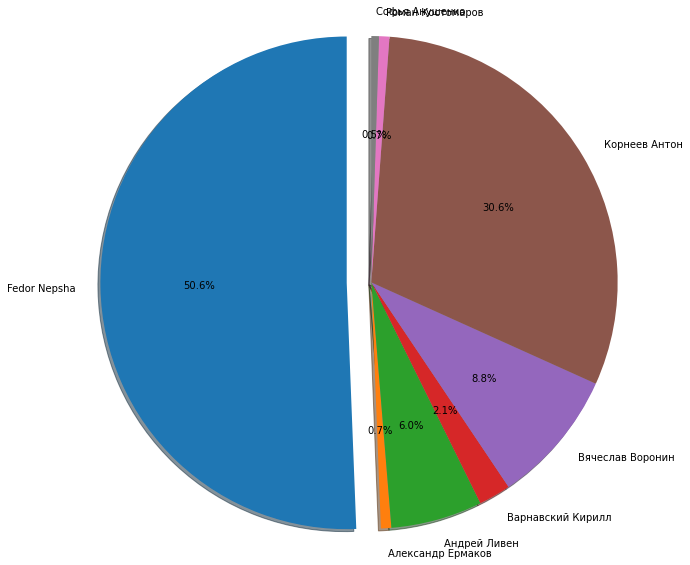

In [115]:
plt.figure(figsize=(15,15))

myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0]
fig1, ax1 = plt.subplots()

ax1.pie(pie['text'], explode = myexplode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 2)

ax1.axis('equal')
fig1.set_size_inches(10,10)
plt.show()

<BarContainer object of 8 artists>

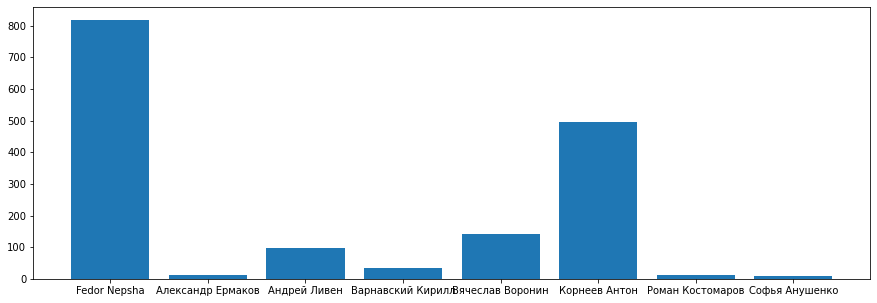

In [109]:
plt.figure(figsize=(15,5))
plt.bar(pie['from'], pie['text'], tick_label = label,
        width = 0.8)

In [49]:
text_df = df.text.dropna()
text = " ".join(review for review in df.text.dropna() if review is not None and type(review) == str)
print ("There are {} words in all the messages.".format(len(text)))

There are 83211 words in all the messages.


In [52]:
from nltk.corpus import stopwords

In [53]:
russian_stopwords = stopwords.words("russian")

In [67]:
stopwords = set(russian_stopwords)
stopwords.update(["это", "Добрый день", "нужно", "Ок", "предлагаю", "завтра", "сегодня", "вроде", "время", "давайте", "Добрый", "день", "Спасибо", "Пока", "сделать", "также", "ещё", "буду", "удобно", "стоит", "посмотреть" ])

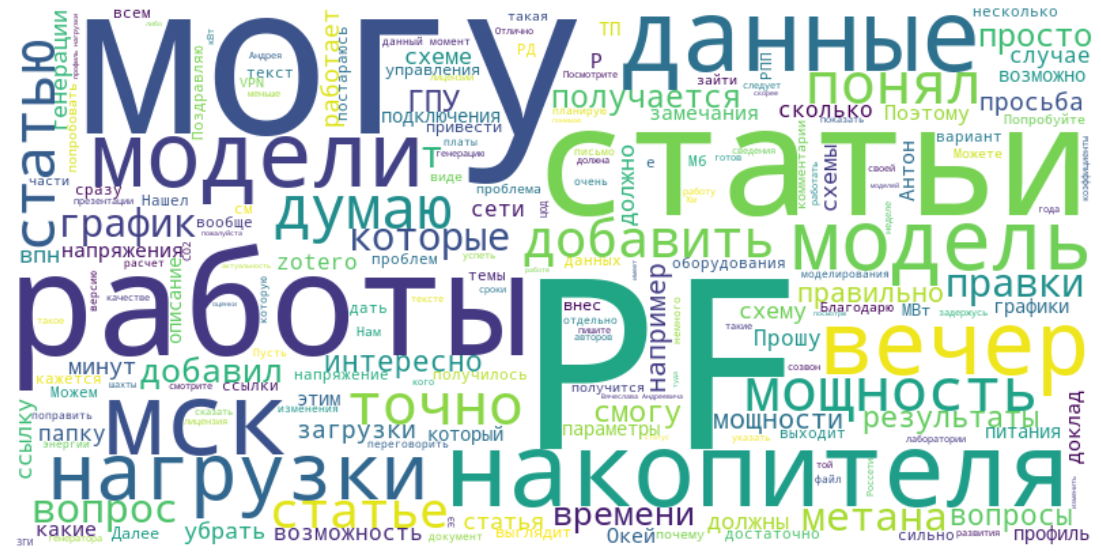

In [70]:
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
pyplot.figure( figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")
pyplot.show()